<a href="https://colab.research.google.com/github/ammu1maru2/AIRBNB-PYTHON-PROJECT-/blob/main/Airbnbproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AIRBNB PROJECT

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("airbnb.csv", encoding= "latin-1")

/tmp/ipython-input-3993313911.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("airbnb.csv", encoding= "latin-1")


In [3]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [4]:
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

CHECKING MISSING VALUES


In [5]:
print(df.isnull().sum())

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

HANDLING MISSING VALUES


convert last review to datetime and hande error

In [7]:
df['last review'] = pd.to_datetime(df['last review'], errors ='coerce')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102349 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102193 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

filling missing values

In [9]:
df.fillna({'review per month': 0 , 'last review': df['last review'].min()}, inplace = True)

drops records with missing values 'name' or 'host name'

In [10]:
df.dropna(subset =['NAME', 'host name'], inplace = True)

In [11]:
print(df.isnull().sum())

id                                     0
NAME                                   0
host id                                0
host_identity_verified               276
host name                              0
neighbourhood group                   26
neighbourhood                         16
lat                                    8
long                                   8
country                              526
country code                         122
instant_bookable                      96
cancellation_policy                   70
room type                              0
Construction year                    200
price                                239
service fee                          268
minimum nights                       403
number of reviews                    182
last review                            0
reviews per month                  15763
review rate number                   314
calculated host listings count       318
availability 365                     420
house_rules     

drop record with missing values

In [12]:
df = df.drop(columns=["licence", "house_rules"], errors='ignore')

In [13]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$966,$193,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$142,$28,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$620,$124,3.0,0.0,2012-07-11,NaN,5.0,1.0,352.0,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$204,$41,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,NaN
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,...,$577,$115,3.0,74.0,2019-06-22,0.59,3.0,1.0,374.0,NaN


CORRECT DATATYPES

Ensure that all columns have correct datatypes

Remove dollors sign and convert to float

In [14]:
df['price'] = df['price'].replace('[/$,]','', regex=True).astype(float)
df['service fee'] = df['service fee'].replace('[/$]','', regex=True).astype(float)

In [15]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,966.0,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,142.0,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,620.0,124.0,3.0,0.0,2012-07-11,NaN,5.0,1.0,352.0,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,204.0,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,NaN
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,...,577.0,115.0,3.0,74.0,2019-06-22,0.59,3.0,1.0,374.0,NaN


REMOVE THE DUPLICATE

In [16]:
df.drop_duplicates(inplace=True)

In [17]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 101410 entries, 0 to 102057
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              101410 non-null  int64         
 1   NAME                            101410 non-null  object        
 2   host id                         101410 non-null  int64         
 3   host_identity_verified          101134 non-null  object        
 4   host name                       101410 non-null  object        
 5   neighbourhood group             101384 non-null  object        
 6   neighbourhood                   101394 non-null  object        
 7   lat                             101402 non-null  float64       
 8   long                            101402 non-null  float64       
 9   country                         100884 non-null  object        
 10  country code                    101288 non-null  object      

DESCRIPTIVE STATISTCS

In [18]:
df.describe()

,id,host id,lat,long,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,1.014100e+05,1.014100e+05,101402.000000,101402.000000,101210.000000,101171.000000,101142.000000,101016.000000,101228.000000,101410,85707.000000,101103.000000,101092.000000,100990.000000
mean,2.920959e+07,4.926155e+10,40.728082,-73.949663,2012.486908,625.381008,125.043998,8.113744,27.511854,2018-05-15 21:26:08.721033728,1.376326,3.278558,7.948463,141.164660
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.000000,50.000000,10.000000,-1223.000000,0.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,1.507574e+07,2.459183e+10,40.688730,-73.982570,2007.000000,340.000000,68.000000,2.000000,1.000000,2017-07-30 00:00:00,0.220000,2.000000,1.000000,3.000000
50%,2.922911e+07,4.912069e+10,40.722300,-73.954440,2012.000000,625.000000,125.000000,3.000000,7.000000,2019-05-23 00:00:00,0.740000,3.000000,1.000000,96.000000
75%,4.328308e+07,7.399747e+10,40.762750,-73.932340,2017.000000,913.000000,183.000000,5.000000,31.000000,2019-07-01 00:00:00,2.010000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2058-06-16 00:00:00,90.000000,5.000000,332.000000,3677.000000
std,1.626820e+07,2.853703e+10,0.055850,0.049474,5.765130,331.609111,66.313374,30.378014,49.549258,NaN,1.749557,1.285369,32.328974,135.419199


VISIUALIZATION

WHAT IS THE DISTRIBUTION OF LISTING PRICES ??

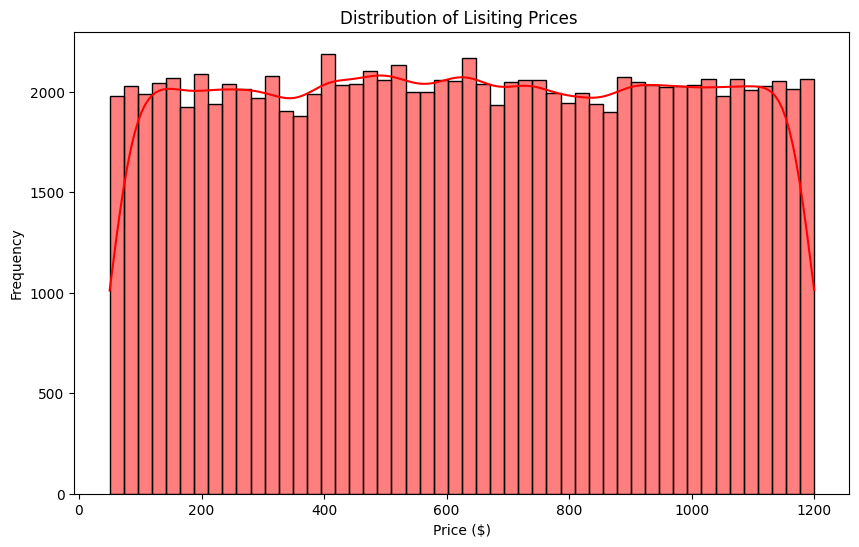

In [19]:
plt.figure(figsize = (10,6))
sns.histplot(df['price'],bins = 50, kde = True,color='red')
plt.title("Distribution of Lisiting Prices ")
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()

The histogram shows a fairly even distribution of listing prices across different ranges, indicating no particular concentration of listing in any specific price range. the KDE help visualize the spread even more clearly, confirming that this dataset contains lisiting  with a wide range of variety of prices.

ROOM TYPES ANALYSIS

Analyze the distribution of different room types.

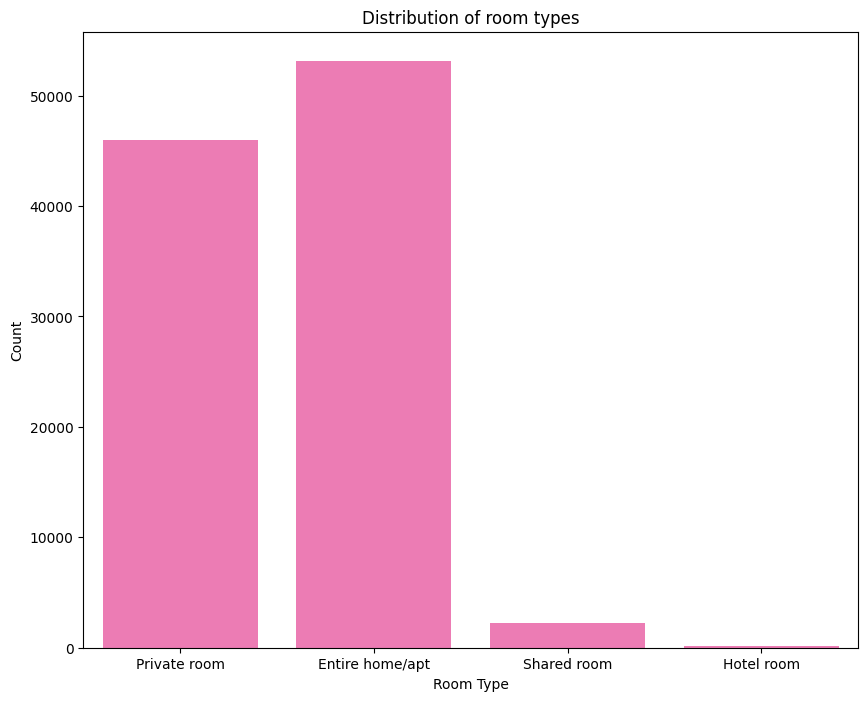

In [20]:
plt.figure(figsize=(10,8))
sns.countplot(x='room type', data=df, color='hotpink')
plt.title('Distribution of room types')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()

The count plot shows a clear distribution of the different room types available in Airbnb dataset.
The majority of lisitings are for
'Entire home/apt' and 'Private room' , and with 'shared room' and 'hotel room'
being much less common.
This insight can be useful for understanding the availability and popularity of different types of accomodation on Airbnb

 NEIGHBORUHOOD ANALYSIS

Examine how listings are distributed across different neighborhoods analysis

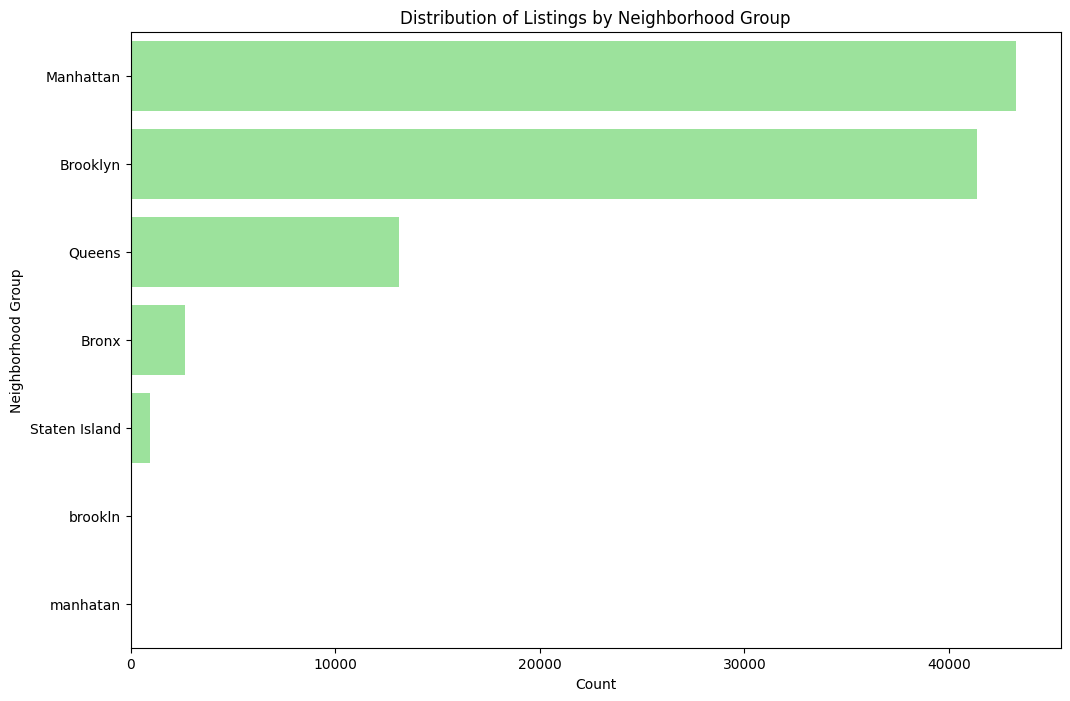

In [21]:
plt.figure(figsize=(12,8))
sns.countplot(y='neighbourhood group', data=df, color="lightgreen", order=df['neighbourhood group'].value_counts().index)
plt.title('Distribution of Listings by Neighborhood Group')
plt.xlabel('Count')
plt.ylabel('Neighborhood Group')
plt.show()

The count plot shows a clear distribution
of the number of lisiting across different neighborhood groups.
Manhattan and brooklyn dominate the lisitings,
suggesting they are prime locations and airbnb. Queens, Broxn , and staten island have fewer listings, indicating less availability or popularity.

PRICE Vs ROOM TYPE

Visiualize the relationship between price and room type

/tmp/ipython-input-434470279.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right')


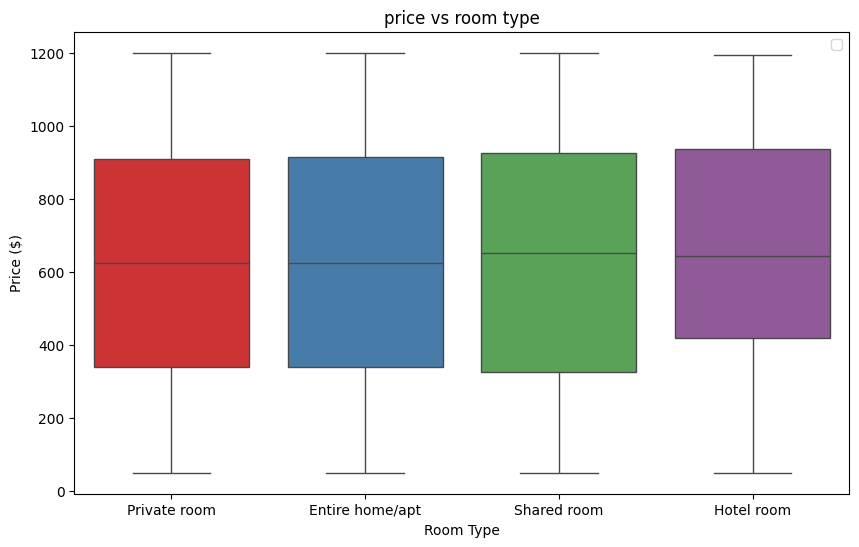

In [22]:
plt.figure(figsize=(10,6))
sns.boxplot(x='room type', y='price', hue = 'room type', data=df, palette='Set1')
plt.title('price vs room type')
plt.xlabel('Room Type')
plt.ylabel('Price ($)')
plt.legend(loc='upper right')
plt.show()

price vs room type
The boxplot provide  a detailed view of how prices vary across different room types in the airbnb dataset. it shows that while
'Shared room' tends to have lower prices, 'Private room',
'Entire home/apt', and 'Hotel room' have higher  and more varied price ranges.
This visualization help in understanding the pricing dynamics for different types of accomodations on Airbnb.

In [23]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,966.0,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,142.0,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,620.0,124.0,3.0,0.0,2012-07-11,NaN,5.0,1.0,352.0,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,204.0,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,NaN
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,...,577.0,115.0,3.0,74.0,2019-06-22,0.59,3.0,1.0,374.0,NaN


REVIEWS OVER TIME

Plot the number of review over time

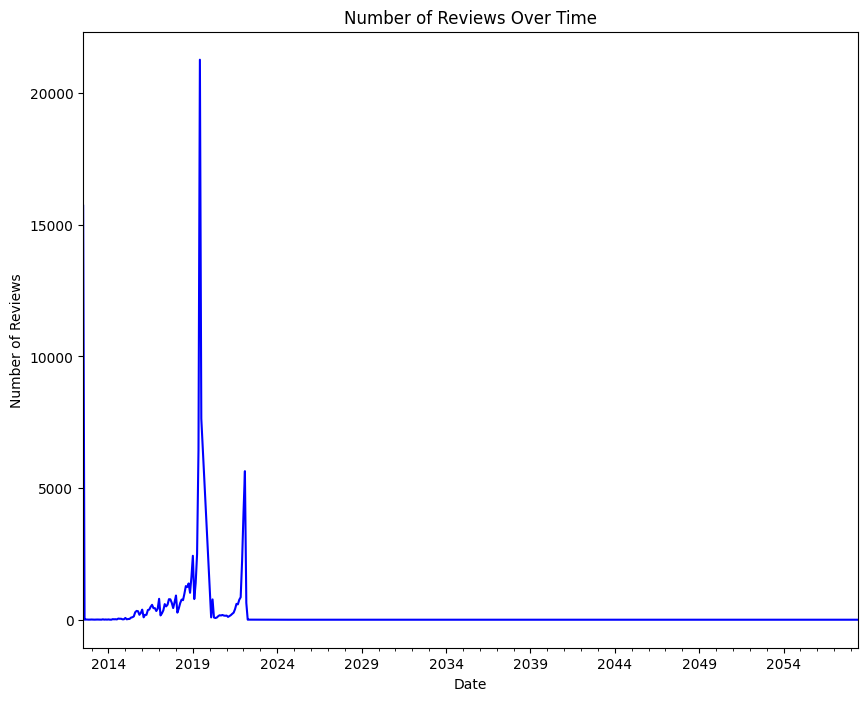

In [31]:
df['last review'] = pd.to_datetime(df['last review'])
review_over_time = df.groupby(df['last review'].dt.to_period('M')).size()
plt.figure(figsize=(10,8))
review_over_time.plot(kind='line', color = 'blue')
plt.title('Number of Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.show()

the line plot clearly visualization of the number of reviews over the time
it helps to identify trends and pattern in review activity, such as periods of high or low activity.
this infomation is helful for understanding the dynamic of user enagement
and popularity of airbnb lisitings over the time The significant spiken and drop in reviews might be worth further investigation to understand the underlying causes, such as changes in airbnb policies , market condition , or external events
